<a href="https://colab.research.google.com/github/samarth0174/pytorch_implementations/blob/master/FaishonMnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw
Processing...
Done!



<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])



In [0]:
import torch

In [0]:
#model
from torch import nn
import torch.nn.functional as F

class Classifier(nn.Module):
  def __init__(self):
    super().__init__()

    self.fc1 = nn.Linear(784,256)
    self.fc2 = nn.Linear(256,128)
    self.fc3 = nn.Linear(128,64)
    self.fc4 = nn.Linear(64,10)
    self.dropout = nn.Dropout(0.2)
  def forward(self,x):
    x = x.view(x.shape[0],-1) #flatten image
    x = self.dropout(F.relu(self.fc1(x)))
    x = self.dropout(F.relu(self.fc2(x)))
    x = self.dropout(F.relu(self.fc3(x)))
    x = F.log_softmax(self.fc4(x),dim=1)

    return x


In [14]:
from torch import optim
model = Classifier()
print(model)


Classifier(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


In [15]:
#using custom helper script from course to visualise
!wget https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/3bd7dea850e936d8cb44adda8200e4e2b5d627e3/intro-to-pytorch/helper.py

--2020-04-20 06:31:57--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/3bd7dea850e936d8cb44adda8200e4e2b5d627e3/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2813 (2.7K) [text/plain]
Saving to: ‘helper.py.2’

helper.py.2         100%[===================>]   2.75K  --.-KB/s    in 0s      

2020-04-20 06:31:57 (58.2 MB/s) - ‘helper.py.2’ saved [2813/2813]



In [16]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 30
steps = 0

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
        optimizer.zero_grad()
        
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        test_loss = 0
        accuracy = 0
        
        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            model.eval() #for testing the  model it turns dropout/batchnorm off
            for images, labels in testloader:
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)
                
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        
        model.train() #keeps the dropouts,batchnorms on 
        
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(train_losses[-1]),
              "Test Loss: {:.3f}.. ".format(test_losses[-1]),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/30..  Training Loss: 0.605..  Test Loss: 0.491..  Test Accuracy: 0.813
Epoch: 2/30..  Training Loss: 0.488..  Test Loss: 0.423..  Test Accuracy: 0.848
Epoch: 3/30..  Training Loss: 0.445..  Test Loss: 0.426..  Test Accuracy: 0.845
Epoch: 4/30..  Training Loss: 0.435..  Test Loss: 0.411..  Test Accuracy: 0.850
Epoch: 5/30..  Training Loss: 0.420..  Test Loss: 0.408..  Test Accuracy: 0.854
Epoch: 6/30..  Training Loss: 0.413..  Test Loss: 0.399..  Test Accuracy: 0.858
Epoch: 7/30..  Training Loss: 0.402..  Test Loss: 0.389..  Test Accuracy: 0.861
Epoch: 8/30..  Training Loss: 0.399..  Test Loss: 0.393..  Test Accuracy: 0.855
Epoch: 9/30..  Training Loss: 0.391..  Test Loss: 0.402..  Test Accuracy: 0.860
Epoch: 10/30..  Training Loss: 0.393..  Test Loss: 0.385..  Test Accuracy: 0.861
Epoch: 11/30..  Training Loss: 0.383..  Test Loss: 0.409..  Test Accuracy: 0.861
Epoch: 12/30..  Training Loss: 0.377..  Test Loss: 0.388..  Test Accuracy: 0.869
Epoch: 13/30..  Training Loss: 0.377.

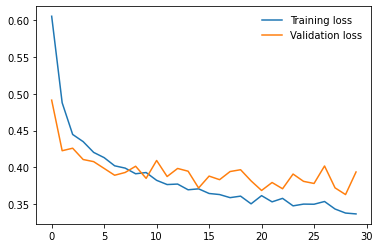

In [17]:
import matplotlib.pyplot as plt
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

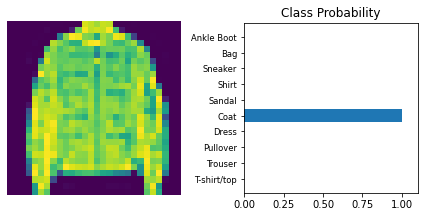

In [26]:
# Import helper module (should be in the repo)
import helper

# Test out your network!

model.eval() #testmode without dropouts/batchnorm

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[32]
# Convert 2D image to 1D vector
img = img.view(1, 784)

# Calculate the class probabilities (softmax) for img
with torch.no_grad():
    output = model.forward(img)

ps = torch.exp(output)

# Plot the image and probabilities

helper.view_classify(img.view(1, 28, 28), ps, version='Fashion')

#Save and load model